In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load dataset
df = pd.read_csv("books_clean.csv")
df.head(5)

,title,price,stock,rating,category
0,A Light in the Attic,51.77,22,3,Poetry
1,Tipping the Velvet,53.74,20,1,Historical Fiction
2,Soumission,50.10,20,1,Fiction
3,Sharp Objects,47.82,20,4,Mystery
4,Sapiens: A Brief History of Humankind,54.23,20,5,History


In [4]:
#descriptive statistics of the data set
df.describe()

,price,stock,rating
count,1000.00000,1000.000000,1000.000000
mean,35.07035,8.585000,2.923000
std,14.44669,5.654622,1.434967
min,10.00000,1.000000,1.000000
25%,22.10750,3.000000,2.000000
50%,35.98000,7.000000,3.000000
75%,47.45750,14.000000,4.000000
max,59.99000,22.000000,5.000000


In [5]:
#calculate mode
price_mode = df['price'].mode()[0]
print("Mode of Price:", price_mode)

rating_mode = df['rating'].mode()[0]
print("Mode of Rating:", rating_mode)

stock_mode = df['stock'].mode()[0]
print("Mode of stock:", stock_mode)

Mode of Price: 16.28
Mode of Rating: 1
Mode of stock: 3


In [6]:
#calculate median
price_median = df['price'].median()
print("Median of Price:", price_median)

rating_median = df['rating'].median()
print("Median of Rating:", rating_median)

stock_median = df['stock'].median()
print("Median of stock:", stock_median)

Median of Price: 35.980000000000004
Median of Rating: 3.0
Median of stock: 7.0


In [16]:
# filter rows where stock equals 1 and get titles as list
count_stock_1 = (df["stock"] == 1).sum()

print("Number of books with stock = 1:", count_stock_1)

Number of books with stock = 1: 98


In [8]:
#Outlier detection (using IQR method)
def find_outliers(series):
    Q1, Q3 = np.percentile(series, [25, 75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

price_outliers = find_outliers(df['price'])
rating_outliers = find_outliers(df['rating'])
print("\nPrice Outliers Count:", len(price_outliers))
print("Rating Outliers Count:", len(rating_outliers))


Price Outliers Count: 0
Rating Outliers Count: 0


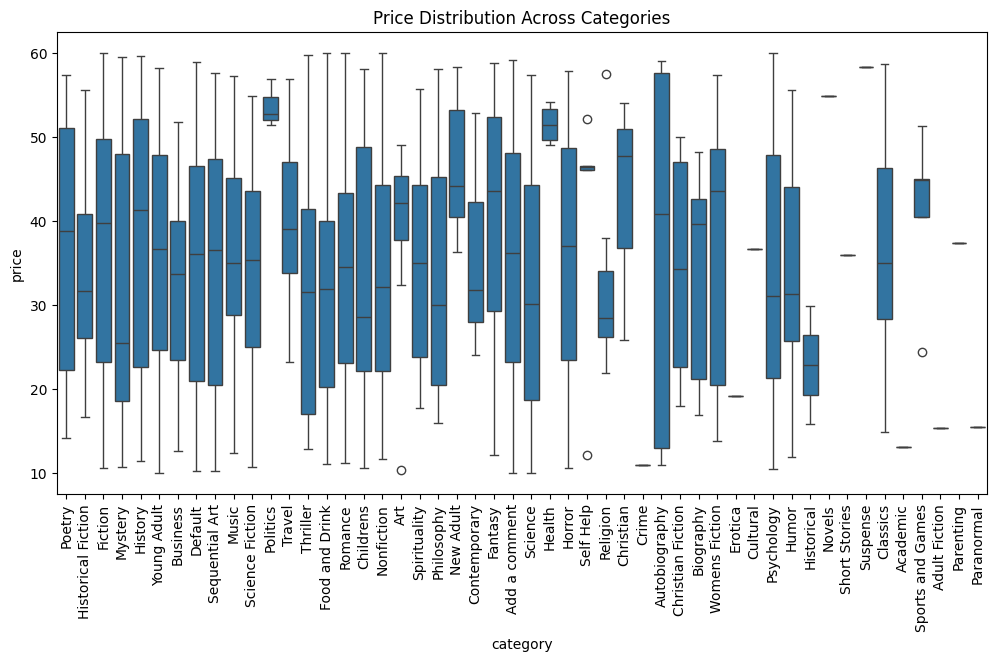

In [9]:
#Price distribution by category

plt.figure(figsize=(12,6))
sns.boxplot(x="category", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Categories")
plt.show()


Category Popularity:
 category
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Travel                 11
Philosophy             11
Thriller               11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Self Help               5
Biography               5
Health                  4
Politics                3
Contem

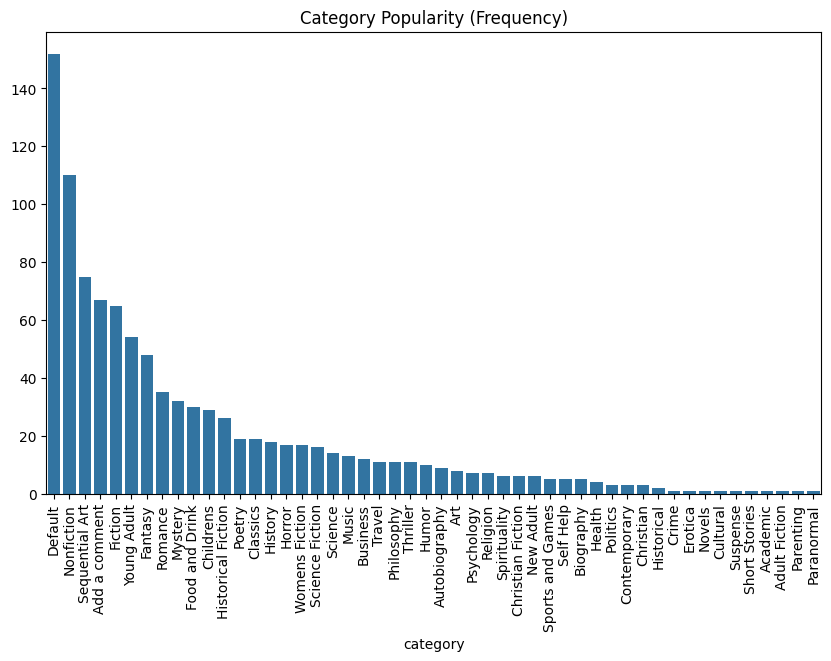

In [10]:
#Category popularity

category_counts = df['category'].value_counts()
print("\nCategory Popularity:\n", category_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("Category Popularity (Frequency)")
plt.show()


Correlation Matrix:
            price    rating     stock
price   1.000000  0.028166 -0.010914
rating  0.028166  1.000000  0.016166
stock  -0.010914  0.016166  1.000000


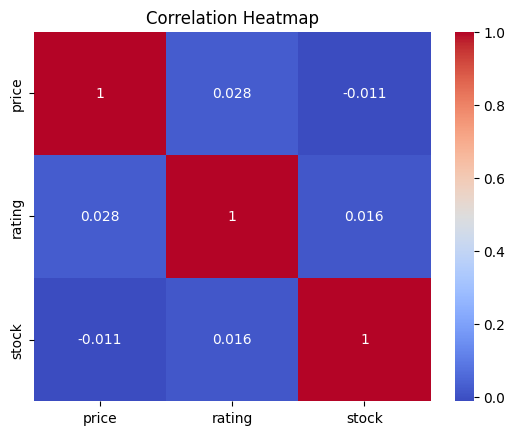

In [11]:
#Correlation analysis between price, rating, and availability

correlation = df[['price','rating','stock']].corr()
print("\nCorrelation Matrix:\n", correlation)

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Rating Summary:
 count    1000.000000
mean        2.923000
std         1.434967
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


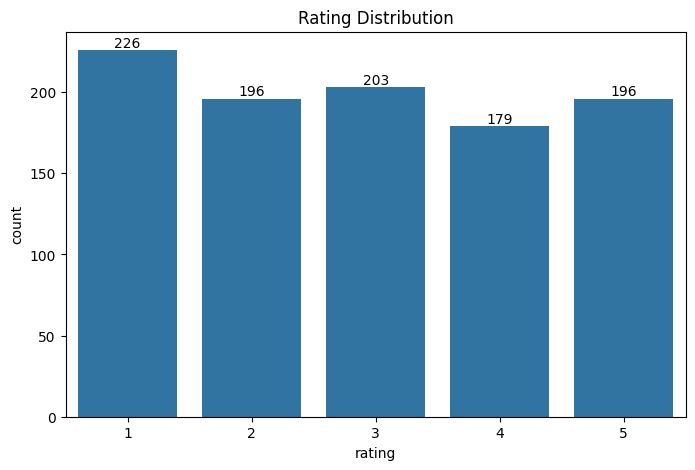

In [12]:
# Rating patterns and statistical summaries

rating_summary = df['rating'].describe()
print("\nRating Summary:\n", rating_summary) # Rating summary

plt.figure(figsize=(8,5))
ax = sns.countplot(x="rating", data=df)
plt.title("Rating Distribution") # Create the plot

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10) # Add count labels on top of bars

plt.show()

In [13]:
#Hypothesis Testing: Fiction vs Non-Fiction Price Comparison

df['is_fiction'] = df['category'].str.contains("Fiction", case=False)

fiction_prices = df[df['is_fiction']]['price']
nonfiction_prices = df[~df['is_fiction']]['price']

t_stat, p_val = stats.ttest_ind(fiction_prices, nonfiction_prices, equal_var=False)
print("\nT-test Fiction vs Non-Fiction Prices:")
print("t-statistic =", t_stat, ", p-value =", p_val)


T-test Fiction vs Non-Fiction Prices:
t-statistic = -0.3973549403361291 , p-value = 0.6913096141085617
